<a href="https://colab.research.google.com/github/Paulacdsd/pgc111/blob/lab03/lab03_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implemente o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

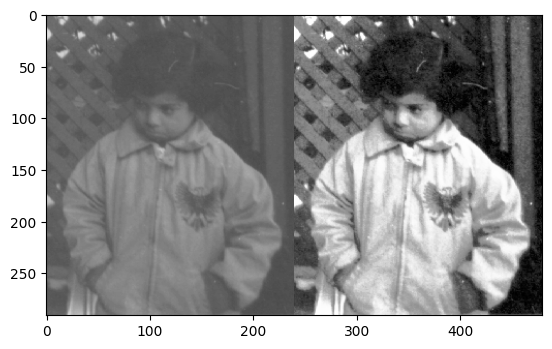

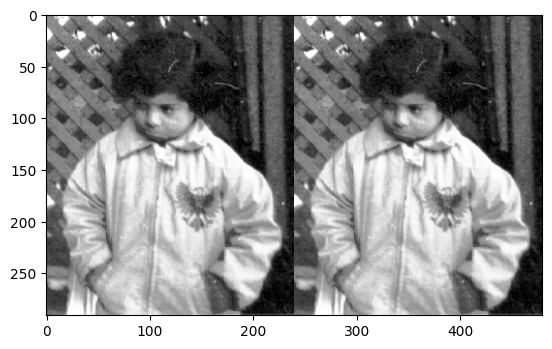

In [1]:
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np

def equaliza(img):
    linhas = img.shape[0]
    colunas = img.shape[1]
    tamanho = linhas * colunas


    unicos, frequencia = np.unique(img,
                                  return_counts = True)


    porcentagem = frequencia/tamanho

    i=0
    acumulada = np.array(porcentagem)

    for p in porcentagem:
        if i==0:
            acumulada[i] = p
        else:
            acumulada[i] = p + acumulada[i-1]

        i+=1


    nivelmax=255

    transformada = nivelmax * acumulada

    #equalizada = np.zeros((linhas,colunas))
    equalizada = np.array(img)
    for indexu, u in np.ndenumerate(unicos):
        t = int(transformada[indexu[0]])
        equalizada[img == u] = t

    return equalizada



img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

equalizada = equaliza(img)
res = np.hstack((img, equalizada))
plt.imshow(res, cmap='gray', vmin=0, vmax=255);
plt.show();

equalizada2 = equaliza(equalizada)

res2 = np.hstack((equalizada, equalizada2))
plt.imshow(res2, cmap='gray', vmin=0, vmax=255);
plt.show();



